# 1. Lineáris regresszió

## 1.1 Lineáris regresszió 1 változóval

Ebben a példában egy ételszállító cég adatain dolgozunk. 
Célunk, hogy előrejelezzük, mekkora lesz a cég profitja, ha egy adott méretű városban
elindítja a szolgáltatását.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# adatok betöltése és ábrázolása
data = pd.read_csv("./data/simpleml/ex1data1.txt", names = ["Population", "Profit"])

Text(0,0.5,'Profit')

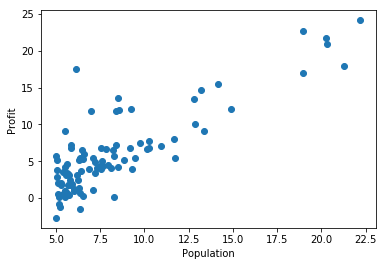

In [20]:
plt.scatter(x=data["Population"], y=data["Profit"])
plt.xlabel("Population")
plt.ylabel("Profit")

Ebben a példában a megfigyeléseink két részből állnak:

* Magyarázóváltozó (feature): $x$ (most a Population). Ez alapján szeretnénk előrejelezni.
* Célváltozó: $y$ (most a Profit). Ezt szeretnénk előrejelezni.

A megfigyeléseink száma $n$, az $i$. megfigyelés feature-eit $x^{(i)}$, a célváltozóját $y^{(i)}$ jelöli. Általános esetben minden egyes megfigyelés több, $n$ feature-t is tartalmazhat, így szerencsésebb a feature-öket indexelni: az $x^{(i)}_j$ az $i$. megfigyelés $j$. feature-e. A továbbiakban a feature-ökből álló vektort értjük az index nélküli jelölés alatt: $x^{(i)}=[x^{(i)}_1,x^{(i)}_2,\dots,x^{(i)}_n]^T$. Ebben a példában $n=1$, így $x^{(i)}$ egy 1 elemű vektor lesz.

A lineáris regresszió lényege, hogy a célváltozót a magyarázó váltózók lineáris függvényével közelíti. Ha a becsült célváltozót $\hat{y}^{(i)}$-vel jelöljük, akkor ezt az alábbi alakban kapjuk meg:

$$ \hat{y}^{(i)} = \theta_0 + \theta_1 x^{(i)}_1.$$

Ez egy (lineáris) modell. Két paramétere van, $\theta_0$ és $\theta_1$, melyeket az egyszerűség kedvéért vektorba szoktak gyűjteni: $\theta=[\theta_0,\theta_1]^T$, így a célváltozó becslése vektorok segítségével még tömörebben kifejezhető:
$$ \hat{y}^{(i)} = \theta^T\cdot x^{(i)}$$
A gépi tanulás célja az $m$ megfigyelés alapján az optimális modell paraméterek, azaz $\theta_0$ és $\theta_1$ meghatározása. 

Hogy mit is jelent az, hogy *optimális*? Ezt egy ún. **loss function** (költségfüggvény) határozza meg, amit $J(\theta)$ jelöl, és pont azt írja le, hogy mennyire rossz a becslés ($\theta$ paraméterek mellett mekkora a veszteség). Lineáris regressziónál az átlagos négyzetes hibát (mean squared error, MSE) szokták alkalmazni, aminek az alakja:

$$J(\theta)=\frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)}_1 - y^{(i)})^2$$

Miért szerencsés a négyzetre emelés? Mert így mindkét irányű hibát (alá- és fölélövést) is büntetni tudjuk. Használhatnánk négyzetreemelés helyett abszolút értéket is, de a négyzet matematikailag könnyebben kezelhető, mert minden pontban létezik a deriváltja.

### 1.1.1 Az optimális paraméterek meghatározása a loss function analitikus megoldásával

Jelen esetben a költségfüggvény annyira egyszerű, hogy matematikailag pontosan is meg határozni a minimumát. Ehhez a $J(\theta)$ függvényt deriválni kell $\theta$ szerint (vigyázat, vektorváltozó!), és ahol a derivált $0$, ott kapjuk az optimumot (na jó, kellene vizsgálni a második deriváltat is, de attól most eltekintünk).

Láttuk, hogy az $x^{(i)}$ feature-ök alapján a becslés $ \hat{y}^{(i)} = \theta^T\cdot x^{(i)}$. Ha az összes megfigyelésre felírjuk ezt az egyenletet, és egymás alá rendezzük őket, akkor megkapjuk, hogy 
$$ \hat{y} = X \theta, $$
ahol $\hat{y}$ az összes célváltozót tartalmazó $m\times 1$-es vektor, és $X$ az összes magyarázó változót tartalmazó $m\times n$-es mátrix. A loss függvény ezzel a jelöléssel:
$$ J(\theta) = \frac{1}{m}(y - X \theta)^T(y - X \theta),$$
melynek a $\theta$ szerinti deriváltja (nem triviális!):
$$ \frac{d}{d\theta} J(\theta) = \frac{2}{m}(X^T X \theta - X^T y).$$

Ennek a $0$ helyét egyszerű mátrix műveletekkel megkaphatjuk:
$$ \theta_{opt}=(X^T X)^{-1}X^T y.$$

Oldjuk meg ezt a példánkra!